In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2023-01-05 18:42:39.866412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 18:42:40.528029: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 18:42:40.528059: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 18:42:42.669003: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv('diemthi.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ho_ten  77 non-null     object 
 1   10%     77 non-null     float64
 2   20%     77 non-null     float64
 3   20%.1   77 non-null     float64
 4   thi     77 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


Loai bo cot ho va ten

In [3]:
df = df.drop(labels='ho_ten', axis=1)
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())


#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

Nulls
=====
10%      0
20%      0
20%.1    0
thi      0
dtype: int64
0s
==
10%      1
20%      3
20%.1    3
thi      3
dtype: int64


In [4]:
corr = df.corr()
print(corr)

            10%       20%     20%.1       thi
10%    1.000000  0.621817  0.517717  0.504732
20%    0.621817  1.000000  0.875314  0.852514
20%.1  0.517717  0.875314  1.000000  0.954001
thi    0.504732  0.852514  0.954001  1.000000


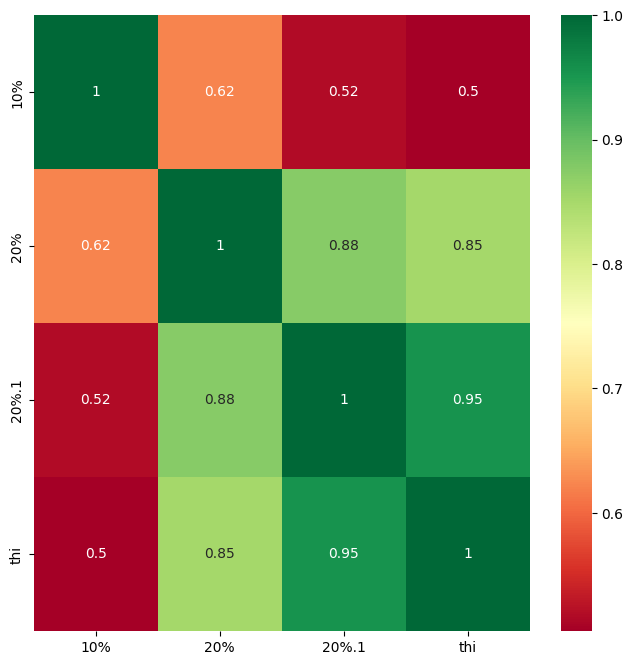

In [5]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

Model se co 3 layer:
Layer 1: la dense layer gom 12 node
Layer 2: la dense layer gom 8 node
Layer 3: la dense layer de tra ve output gom 1 node (tra ve diem thi)

In [6]:
X = df[['10%','20%','20%.1']]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"]) 

history=model.fit(X_train, y_train,epochs=10,batch_size=10,validation_split=0.3, verbose=0)
print(history.history.keys())
y_pred = model.predict(X_test)
print(y_pred.size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


2023-01-05 18:42:45.502232: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-05 18:42:45.502852: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-05 18:42:45.502892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (duc-Latitude-7390): /proc/driver/nvidia/version does not exist
2023-01-05 18:42:45.503678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
1/1 [==============================] - 0s 138ms/step
24


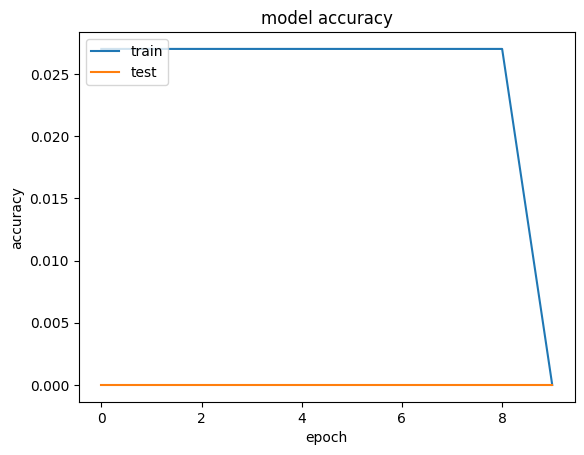

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

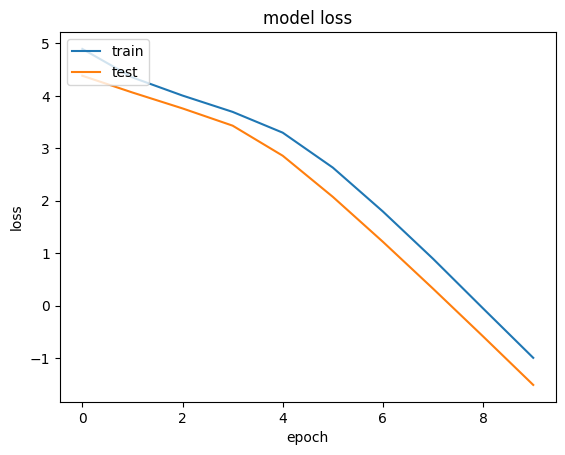

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()